## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load files

#### Usage

In [2]:
df = pd.read_csv('Full Eletric Interval 042016.csv')

#### Properties

In [3]:
df2 = pd.read_excel('SIMS_Property_List_4-6-2016_Revised.xlsx')

## List of building codes

In [4]:
codes = pd.Series([b[0] for b in df['Meter'].str.split()])

In [5]:
unicodes = codes.unique()

## Cumulative usage data

In [6]:
cumulst = []
for b in unicodes:
    cumulst.append(df.Usage[codes.isin([b])].sum())

In [7]:
cumulusage = pd.Series(cumulst)

## Age data

In [8]:
agelst = []
for code in unicodes:
    agelst.append(df2[df2['Property Code'].isin([code])]['Year Constructed'])

In [9]:
age = pd.DataFrame(agelst).sum(axis=1)

In [10]:
age = age.reset_index(drop=True)

## Area data

In [33]:
arealst = []
for b in unicodes:
    arealst.append(df2[df2['Property Code'].isin([b])]['FCIM Gross Area'])

In [34]:
area = pd.DataFrame(arealst).sum(axis=1)

In [35]:
area = area.reset_index(drop=True)

## Cumulative usage normalized for area

In [36]:
cumularea = cumulusage.divide(area)

In [37]:
cumularea = cumularea.replace(np.inf, np.nan)

## Age against usage plot

In [38]:
agedf = pd.concat([cumularea, age], axis=1)

In [39]:
agedf.columns = ['Usage', 'Year Built']

In [41]:
agedf

,Usage,Year Built
0,17.817890,1984.0
1,66.850588,1929.0
2,26.136168,1938.0
3,40.848659,1929.0
4,40.245838,1954.0
5,87.099764,1977.0
6,89.158624,1969.0
7,30.853641,1907.0
8,114.101624,1973.0
9,32.092005,1902.0


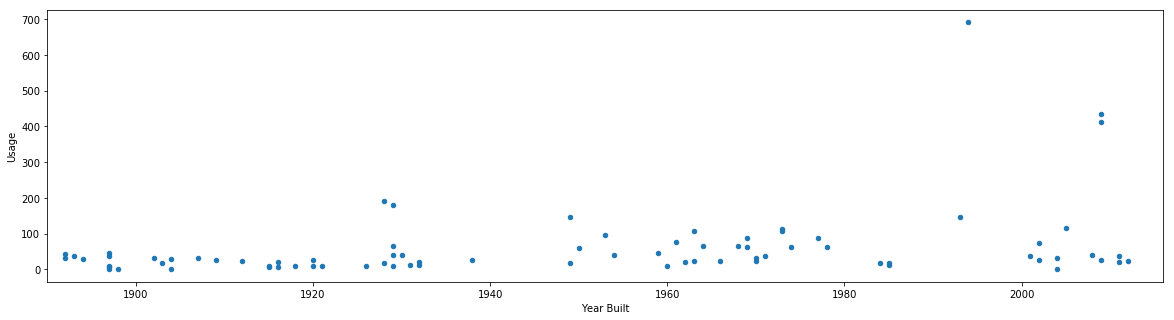

In [40]:
agedf.plot.scatter(figsize=(20,5), x='Year Built', y='Usage', xlim=(1890, 2016))

In [67]:
grouped = agedf.groupby(by=['Year Built']).mean()

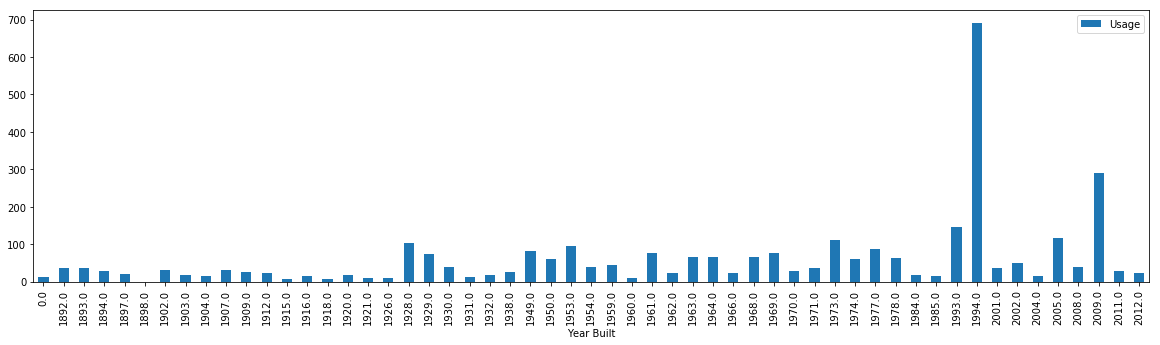

In [86]:
grouped.plot.bar(figsize=(20,5))